## Analyzing Heart Disease Data using Statistical Inference Techniques

A project for my Codecademy Data Scientist certification, for specialists in Machine Learning.

Data downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).

Robert Hall

08/20/2024

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Import Data

Features:

* age:              
age in years

* sex:              
sex assigned at birth (binary 'male' or 'female')

* trestbps:         
resting blood pressure (mm Hg)

* chol:             
serum cholesterol in mg/dL

* cp:               
chest pain ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic')

* exang:            
patient experiences exercise angina (binary 1 for yes, 0 for no)

* fbs:              
fasting blood sugar > 120 mg/dL (binary 1 for yes, 0 for no)

* thalach:          
maximum heart rate achieved in exercise test

* heart_disease:    
heart disease presence in patient (binary "presence" or "absence")

In [48]:
# load data
heart = pd.read_csv('heart_disease.csv')

# inspect heart dataframe
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


#### is a patient's maximum heart rate in their exercise test associated with their heart disease diagnosis?

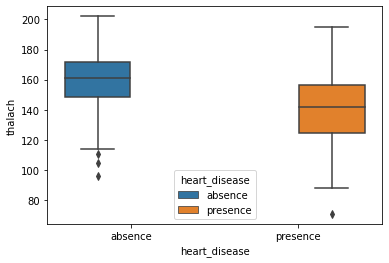

Difference in Mean Max Heart Rate: 19.12
Difference in Median Max Heart Rate: 19.0


<Figure size 432x288 with 0 Axes>

In [49]:
sns.boxplot(x=heart.heart_disease, y=heart.thalach, data=heart, hue=heart.heart_disease)
plt.show()
plt.clf()

thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

diff_thalach_means = round(thalach_no_hd.mean() - thalach_hd.mean(), 2)
diff_thalach_medians = thalach_no_hd.median() - thalach_hd.median()

print(f"Difference in Mean Max Heart Rate: {diff_thalach_means}")
print(f"Difference in Median Max Heart Rate: {diff_thalach_medians}")

In [50]:
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(f"alpha: 0.05")
print(f"p-value: {pval}")

alpha: 0.05
p-value: 3.456964908430172e-14


There is a statistically significant difference between the maximum heart rate achieved during the exercise examination of patients with and without heart disease. Those without heart disease have a significantly higher maximum BPM during the examination than those who do have heart disease.

#### Is the average age of heart disease patients significantly different from that of patients without heart disease?

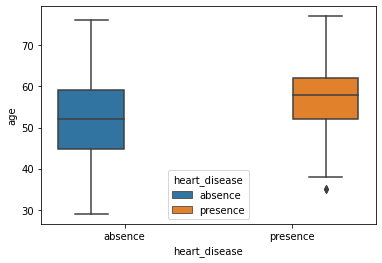

Mean Age of Heart Disease Patients:     56.62589928057554
Mean Age of non-Heart Disease Patients:     52.58536585365854
alpha: 0.05
p-value: 8.955636917529706e-05


<Figure size 432x288 with 0 Axes>

In [51]:
sns.boxplot(x=heart.heart_disease, y=heart.age, data=heart, hue=heart.heart_disease)
plt.show()
plt.clf()

age_hd = heart.age[heart['heart_disease'] == 'presence']
age_no_hd = heart.age[heart['heart_disease'] == 'absence']

print(f"Mean Age of Heart Disease Patients:     {age_hd.mean()}")
print(f"Mean Age of non-Heart Disease Patients:     {age_no_hd.mean()}")

ttest, pval = ttest_ind(age_hd, age_no_hd)
print(f"alpha: 0.05")
print(f"p-value: {pval}")

There is a statistically significant difference in mean age between patients who have, and patients who do not have, heart disease. Patients with heart disease are typically older than those who do not have heart disease.

#### Is the average resting blood pressure (in mm Hg) of heart disease patients significantly different than that of patients without heart disease?

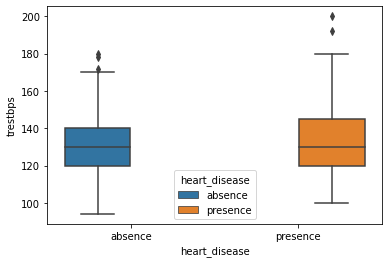

alpha: 0.05
p-value: 0.008548268928594928


<Figure size 432x288 with 0 Axes>

In [52]:
sns.boxplot(x=heart.heart_disease, y=heart.trestbps, data=heart, hue=heart.heart_disease)
plt.show()
plt.clf()

trestbps_hd = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_no_hd = heart.trestbps[heart['heart_disease'] == 'absence']

ttest, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print(f"alpha: 0.05")
print(f"p-value: {pval}")

There is a statistically significant difference in resting blood pressure between patients who have heart disease and those who do not. Patients with heart disease have significantly higher blood pressure, on average, than do those without heart disease.

#### is the average cholesterol of heart disease patients significantly different from that of non-heart disease patients?


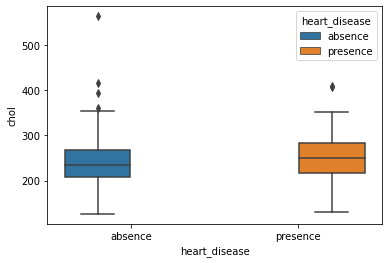

alpha: 0.05
p-value: 0.13914167020436527


<Figure size 432x288 with 0 Axes>

In [53]:
sns.boxplot(x=heart.heart_disease, y=heart.chol, data=heart, hue=heart.heart_disease)
plt.show()
plt.clf()

chol_hd = heart.chol[heart['heart_disease'] == 'presence']
chol_no_hd = heart.chol[heart['heart_disease'] == 'absence']

ttest, pval = ttest_ind(chol_hd, chol_no_hd)
print("alpha: 0.05")
print(f"p-value: {pval}")

There is no statistically significant difference between average cholesterol of heart disease patients and patients without heart disease.

#### What are the distributions of exercise exam maximum heart rate levels between patients for each type of chest pain experienced?

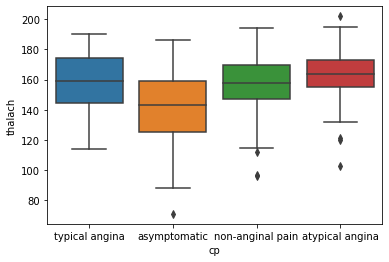

<Figure size 432x288 with 0 Axes>

In [54]:
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()
plt.clf()

#### Do patients with typical angina, non-anginal pain, atypical angina and chest-pain asymptomatic all have the same, or significantly different average maximum heart rate during their exercise exams?


In [55]:
thalach_typical = heart.thalach[heart['cp'] == 'typical angina']
thalach_asymptom = heart.thalach[heart['cp'] == 'asymptomatic']
thalach_nonangin = heart.thalach[heart['cp'] == 'non-anginal pain']
thalach_atypical = heart.thalach[heart['cp'] == 'atypical angina']

fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print("alpha: 0.05")
print(f"p-value: {pval}")

alpha: 0.05
p-value: 1.9065505247705008e-10


In [56]:
# which pairs of thalach and chest pain are significantly different?

tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, alpha=0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


Asymptomatic patients have statistically significant lower heart rates compared with patients experiencing atypical angina, non-anginal chest pain, and typical angina.

#### Is there a statistical association between the kind of chest pain a patient experiences and whether or not they have heart disease?

In [57]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


In [58]:
chi2, pval, dof, expected = chi2_contingency(Xtab)
print("alpha: 0.05")
print(f"p-value: {pval}")

alpha: 0.05
p-value: 1.2517106007837527e-17


There is in fact a statistically significant relationship between the type of chest pain that a patient experiences, and whether or not that patient has heart disease. 